# 🌍 GLOBAL HAPPINESS INDEX ANALYSIS PROJECT WITH PYTHON

**AUTHOR:** Geoffrey K. Rono  
**STUDENT ID:** 74199495  
**PROGRAM:** Master of Science in Data Science  
**COURSE:** PS25 - Data Visualization  
**INSTRUCTOR:** Prof. Sami ur Rahman  
**INSTITUTION:** University of Europe for Applied Sciences – Potsdam  
**DATE:** July 2025


In [1]:
# 🔹 Step 1: Project Initialization
# 🪄 What to Expect:
# Importing essential Python libraries and configuring display settings for analysis.
#
# ✅ Accomplished:
# ✅ Libraries imported (pandas, numpy, matplotlib, seaborn, plotly)
# ✅ Display settings configured for clean workflow
# ---------------------------------------------------------------

# Data analysis and visualization libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px

# Display settings for wider visibility
pd.set_option('display.max_columns', None)
plt.style.use('ggplot')

# Inline plotting for Jupyter
%matplotlib inline

# 🔹 Step 2: Project Objective & Structure

## 🎯 Project Objective

The goal of this project is to **analyze the World Happiness Index (2015–2019)** using Python and data visualization techniques to:

✅ Understand global happiness score trends across countries  
✅ Identify top and bottom happiest countries  
✅ Explore the relationship between happiness and socio-economic indicators  
✅ Create interactive and static visualizations for clear insights  
✅ Prepare a clean, portfolio-ready analysis for academic and professional presentation

---

## 🗂️ Project Structure

This notebook is organized into:

1️⃣ **Data Loading and Preprocessing**  
2️⃣ **Exploratory Data Analysis (EDA)**  
3️⃣ **Key Visualizations (Histograms, Boxplots, Bar Charts, Choropleth Maps)**  
4️⃣ **Correlation and Feature Importance Analysis**  
5️⃣ **Interactive Dashboard Preparation (Streamlit)**  
6️⃣ **Summary and Insights**


In [2]:
# 🔹 Step 3: Data Loading and Preprocessing

# 3.1 Import the dataset
df_2015 = pd.read_csv('2015.csv')
df_2016 = pd.read_csv('2016.csv')
df_2017 = pd.read_csv('2017.csv')
df_2018 = pd.read_csv('2018.csv')
df_2019 = pd.read_csv('2019.csv')

# 3.2 Display the shape and sample of each dataset for verification
print("2015:", df_2015.shape)
print("2016:", df_2016.shape)
print("2017:", df_2017.shape)
print("2018:", df_2018.shape)
print("2019:", df_2019.shape)

# 3.3 Display the first few rows of the 2015 dataset as a preview
df_2015.head()


2015: (158, 12)
2016: (157, 13)
2017: (155, 12)
2018: (156, 9)
2019: (156, 9)


,Country,Region,Happiness Rank,Happiness Score,Standard Error,Economy (GDP per Capita),Family,Health (Life Expectancy),Freedom,Trust (Government Corruption),Generosity,Dystopia Residual
0,Switzerland,Western Europe,1,7.587,0.03411,1.39651,1.34951,0.94143,0.66557,0.41978,0.29678,2.51738
1,Iceland,Western Europe,2,7.561,0.04884,1.30232,1.40223,0.94784,0.62877,0.14145,0.43630,2.70201
2,Denmark,Western Europe,3,7.527,0.03328,1.32548,1.36058,0.87464,0.64938,0.48357,0.34139,2.49204
3,Norway,Western Europe,4,7.522,0.03880,1.45900,1.33095,0.88521,0.66973,0.36503,0.34699,2.46531
4,Canada,North America,5,7.427,0.03553,1.32629,1.32261,0.90563,0.63297,0.32957,0.45811,2.45176


In [3]:
# 🔹 Step 4: Data Cleaning, Standardization, and Merging

# 4.1 Standardize column names
def clean_column_names(df):
    df.columns = (
        df.columns.str.strip()
        .str.replace(' ', '_')
        .str.replace(r'[().]', '', regex=True)
        .str.lower()
    )
    return df

df_2015 = clean_column_names(df_2015)
df_2016 = clean_column_names(df_2016)
df_2017 = clean_column_names(df_2017)
df_2018 = clean_column_names(df_2018)
df_2019 = clean_column_names(df_2019)

# 4.2 Explicit renaming for consistency

df_2017 = df_2017.rename(columns={
    'happinessscore': 'happiness_score',
    'economygdppercapita': 'economy_gdp_per_capita',
    'healthlifeexpectancy': 'health_life_expectancy',
    'trustgovernmentcorruption': 'trust_government_corruption',
    'happinessrank': 'happiness_rank',
    'whiskerhigh': 'whisker_high',
    'whiskerlow': 'whisker_low',
    'dystopiaresidual': 'dystopia_residual'
})

df_2018 = df_2018.rename(columns={
    'country_or_region': 'country',
    'score': 'happiness_score',
    'gdp_per_capita': 'economy_gdp_per_capita',
    'healthy_life_expectancy': 'health_life_expectancy',
    'perceptions_of_corruption': 'trust_government_corruption'
})

df_2019 = df_2019.rename(columns={
    'country_or_region': 'country',
    'score': 'happiness_score',
    'gdp_per_capita': 'economy_gdp_per_capita',
    'healthy_life_expectancy': 'health_life_expectancy',
    'perceptions_of_corruption': 'trust_government_corruption'
})

# 4.3 Add missing columns where necessary
for df in [df_2018, df_2019]:
    for col in ['family', 'freedom']:
        if col not in df.columns:
            df[col] = np.nan  # Add missing columns with NaN

# 4.4 Add 'year' column
df_2015['year'] = 2015
df_2016['year'] = 2016
df_2017['year'] = 2017
df_2018['year'] = 2018
df_2019['year'] = 2019

# 4.5 Columns to retain
common_columns = [
    'country', 'happiness_score', 'economy_gdp_per_capita', 'family',
    'health_life_expectancy', 'freedom', 'trust_government_corruption',
    'generosity', 'year'
]

# 4.6 Subset cleanly
df_2015 = df_2015[common_columns]
df_2016 = df_2016[common_columns]
df_2017 = df_2017[common_columns]
df_2018 = df_2018[common_columns]
df_2019 = df_2019[common_columns]

# 4.7 Concatenate into a single clean DataFrame
df_all = pd.concat([df_2015, df_2016, df_2017, df_2018, df_2019], ignore_index=True)

# 4.8 Confirm clean merge
print(f"✅ Merged dataset shape: {df_all.shape}")
print(f"✅ Years available: {df_all['year'].unique()}")

# Display sample
df_all.head()


✅ Merged dataset shape: (782, 9)
✅ Years available: [2015 2016 2017 2018 2019]


,country,happiness_score,economy_gdp_per_capita,family,health_life_expectancy,freedom,trust_government_corruption,generosity,year
0,Switzerland,7.587,1.39651,1.34951,0.94143,0.66557,0.41978,0.29678,2015
1,Iceland,7.561,1.30232,1.40223,0.94784,0.62877,0.14145,0.43630,2015
2,Denmark,7.527,1.32548,1.36058,0.87464,0.64938,0.48357,0.34139,2015
3,Norway,7.522,1.45900,1.33095,0.88521,0.66973,0.36503,0.34699,2015
4,Canada,7.427,1.32629,1.32261,0.90563,0.63297,0.32957,0.45811,2015


✅ Sample of the merged dataset for validation:


,country,happiness_score,economy_gdp_per_capita,family,health_life_expectancy,freedom,trust_government_corruption,generosity,year
0,Switzerland,7.587,1.39651,1.34951,0.94143,0.66557,0.41978,0.29678,2015
1,Iceland,7.561,1.30232,1.40223,0.94784,0.62877,0.14145,0.43630,2015
2,Denmark,7.527,1.32548,1.36058,0.87464,0.64938,0.48357,0.34139,2015
3,Norway,7.522,1.45900,1.33095,0.88521,0.66973,0.36503,0.34699,2015
4,Canada,7.427,1.32629,1.32261,0.90563,0.63297,0.32957,0.45811,2015


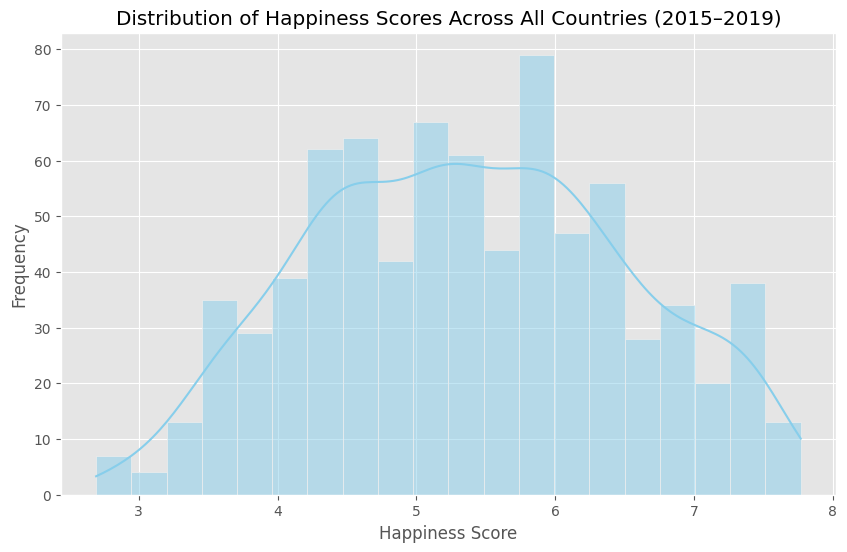

In [4]:
# 🔹 Step 5: Dataset Sample Display and Happiness Score Distribution

# 5.1 Display a sample of the cleaned, merged dataset
print("✅ Sample of the merged dataset for validation:")
display(df_all.head())

# 5.2 Plot histogram: Happiness Score distribution
plt.figure(figsize=(10, 6))
sns.histplot(df_all['happiness_score'], bins=20, kde=True, color='skyblue')
plt.title('Distribution of Happiness Scores Across All Countries (2015–2019)')
plt.xlabel('Happiness Score')
plt.ylabel('Frequency')
plt.show()


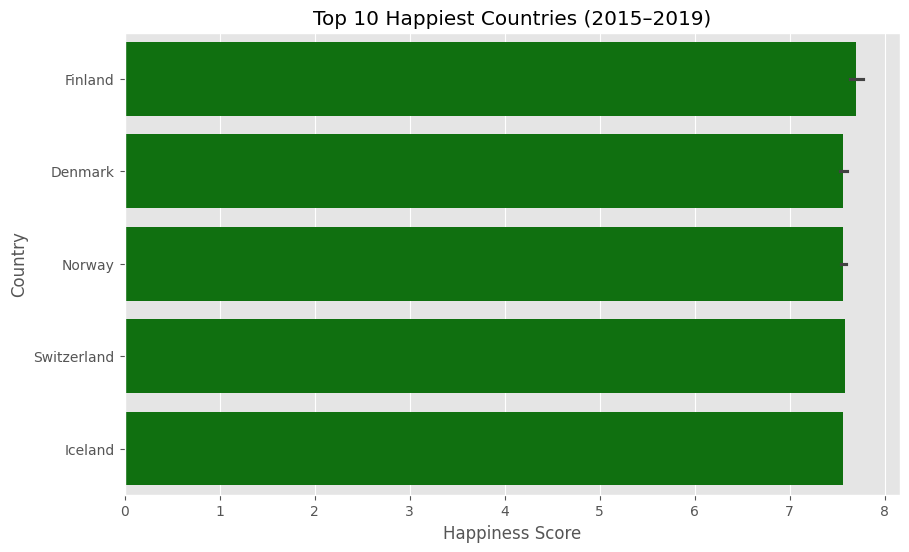

<module 'seaborn' from '/Users/ronos/Documents/global_happiness_project/venv/lib/python3.13/site-packages/seaborn/__init__.py'>

<Figure size 1000x600 with 0 Axes>

In [5]:
# 🔹 Step 6: Top and Bottom 10 Happiest Countries Visualization

# 6.1 Identify top 10 happiest countries
top_10 = df_all.sort_values(by='happiness_score', ascending=False).head(10)

# 6.2 Identify bottom 10 happiest countries
bottom_10 = df_all.sort_values(by='happiness_score', ascending=True).head(10)

# 6.3 Plot Top 10 Happiest Countries
plt.figure(figsize=(10, 6))
sns.barplot(data=top_10, x='happiness_score', y='country', color='green')
plt.title('Top 10 Happiest Countries (2015–2019)')
plt.xlabel('Happiness Score')
plt.ylabel('Country')
plt.show()

# 6.4 Plot Bottom 10 Happiest Countries
plt.figure(figsize=(10, 6))
sns

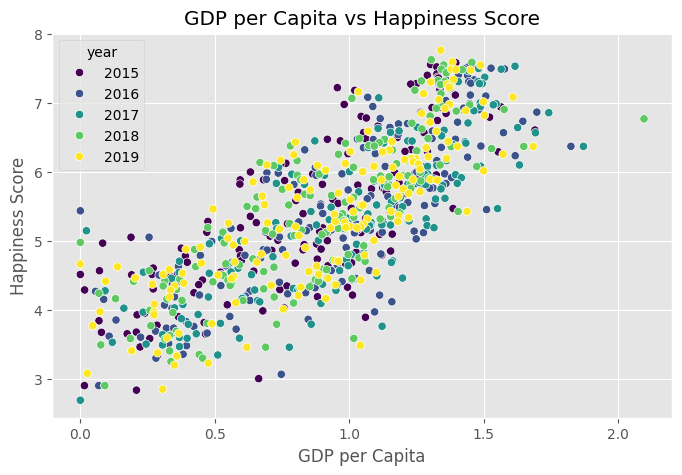

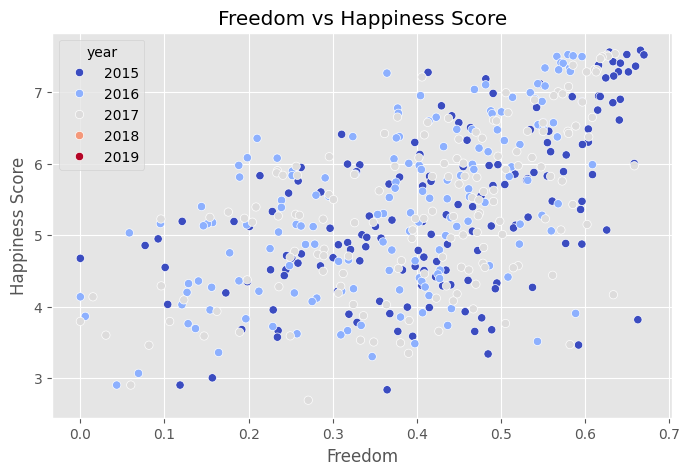

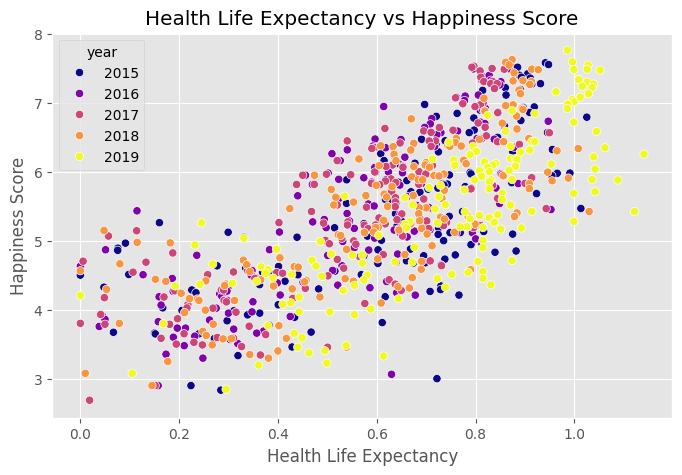

In [6]:
# 🔹 Step 7: Correlation of Happiness and Indicators

# 7.1 GDP per Capita vs Happiness Score
plt.figure(figsize=(8, 5))
sns.scatterplot(data=df_all, x='economy_gdp_per_capita', y='happiness_score', hue='year', palette='viridis')
plt.title('GDP per Capita vs Happiness Score')
plt.xlabel('GDP per Capita')
plt.ylabel('Happiness Score')
plt.show()

# 7.2 Freedom vs Happiness Score
plt.figure(figsize=(8, 5))
sns.scatterplot(data=df_all, x='freedom', y='happiness_score', hue='year', palette='coolwarm')
plt.title('Freedom vs Happiness Score')
plt.xlabel('Freedom')
plt.ylabel('Happiness Score')
plt.show()

# 7.3 Health Life Expectancy vs Happiness Score
plt.figure(figsize=(8, 5))
sns.scatterplot(data=df_all, x='health_life_expectancy', y='happiness_score', hue='year', palette='plasma')
plt.title('Health Life Expectancy vs Happiness Score')
plt.xlabel('Health Life Expectancy')
plt.ylabel('Happiness Score')
plt.show()

Top 5 Countries in 2015: ['Switzerland', 'Iceland', 'Denmark', 'Norway', 'Canada']


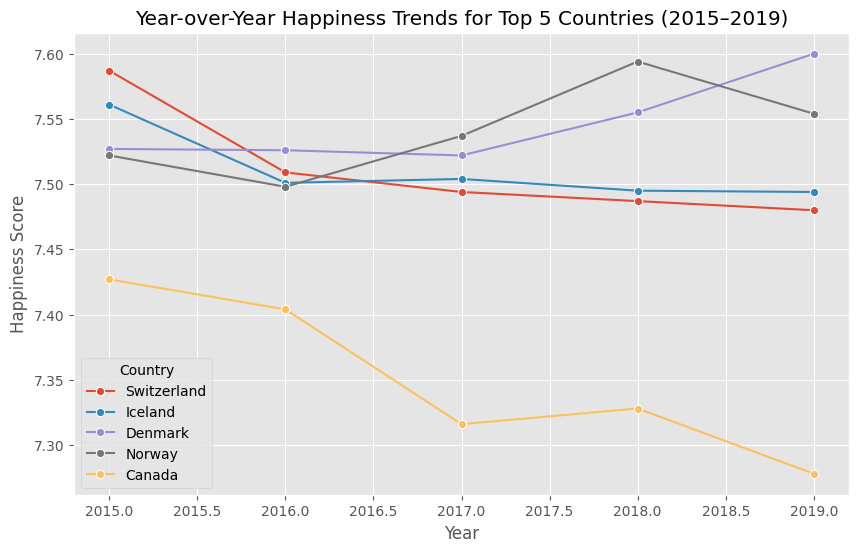

In [7]:
# 🔹 Step 8: Year-over-Year Comparison (Top 5 Countries)

# 8.1 Identify Top 5 Countries in 2015
top5_2015 = df_all[df_all['year'] == 2015].nlargest(5, 'happiness_score')['country'].tolist()
print("Top 5 Countries in 2015:", top5_2015)

# 8.2 Filter dataset for these countries across all years
df_top5 = df_all[df_all['country'].isin(top5_2015)]

# 8.3 Plot year-over-year happiness trends
plt.figure(figsize=(10, 6))
sns.lineplot(data=df_top5, x='year', y='happiness_score', hue='country', marker='o')
plt.title('Year-over-Year Happiness Trends for Top 5 Countries (2015–2019)')
plt.xlabel('Year')
plt.ylabel('Happiness Score')
plt.legend(title='Country')
plt.show()

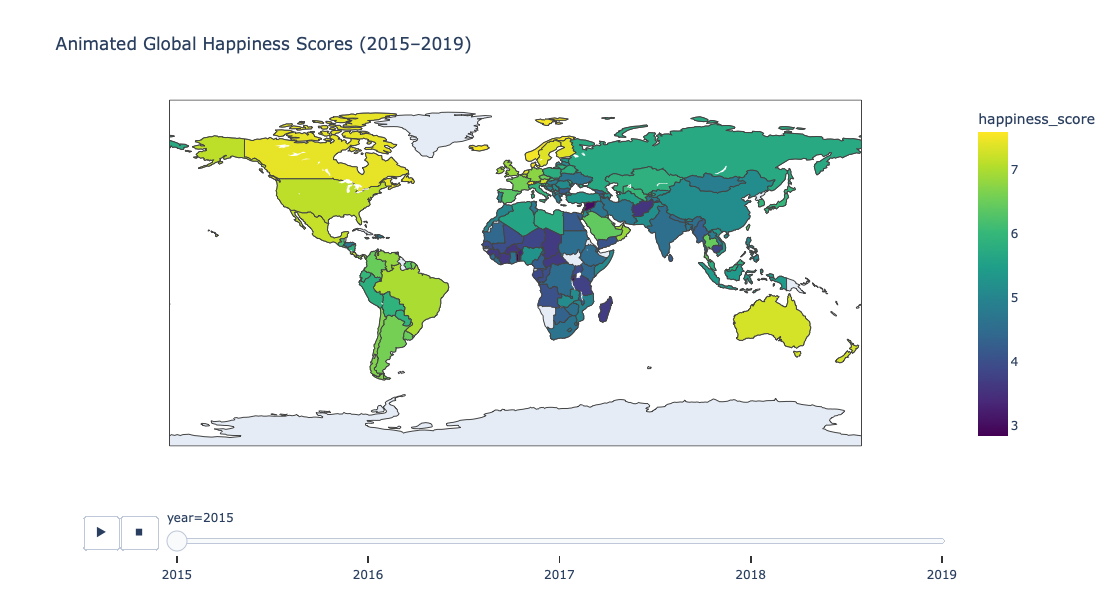

In [8]:
# 🔹 Step 9: World Map of Happiness (Animated Choropleth)

import plotly.express as px

fig = px.choropleth(
    df_all,
    locations='country',
    locationmode='country names',
    color='happiness_score',
    hover_name='country',
    animation_frame='year',
    color_continuous_scale='Viridis',
    title='Animated Global Happiness Scores (2015–2019)',
    height=600
)

fig.show()

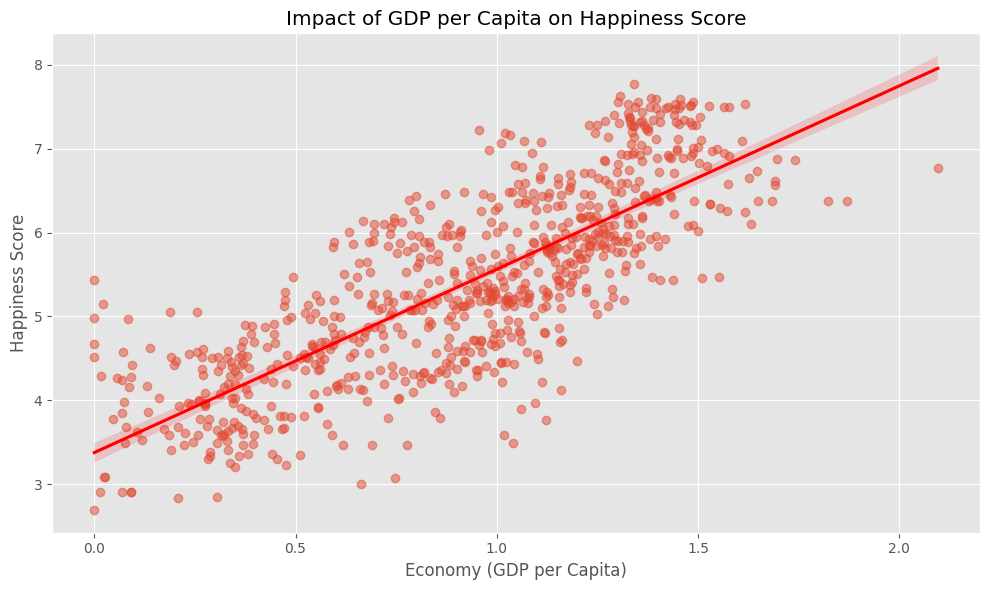

In [9]:
# 10. Impact of GDP on Happiness

plt.figure(figsize=(10, 6))
sns.regplot(
    data=df_all,
    x='economy_gdp_per_capita',
    y='happiness_score',
    scatter_kws={'alpha':0.5},
    line_kws={'color':'red'}
)
plt.title('Impact of GDP per Capita on Happiness Score')
plt.xlabel('Economy (GDP per Capita)')
plt.ylabel('Happiness Score')
plt.grid(True)
plt.tight_layout()
plt.savefig('impact_gdp_on_happiness.png', dpi=300)
plt.show()


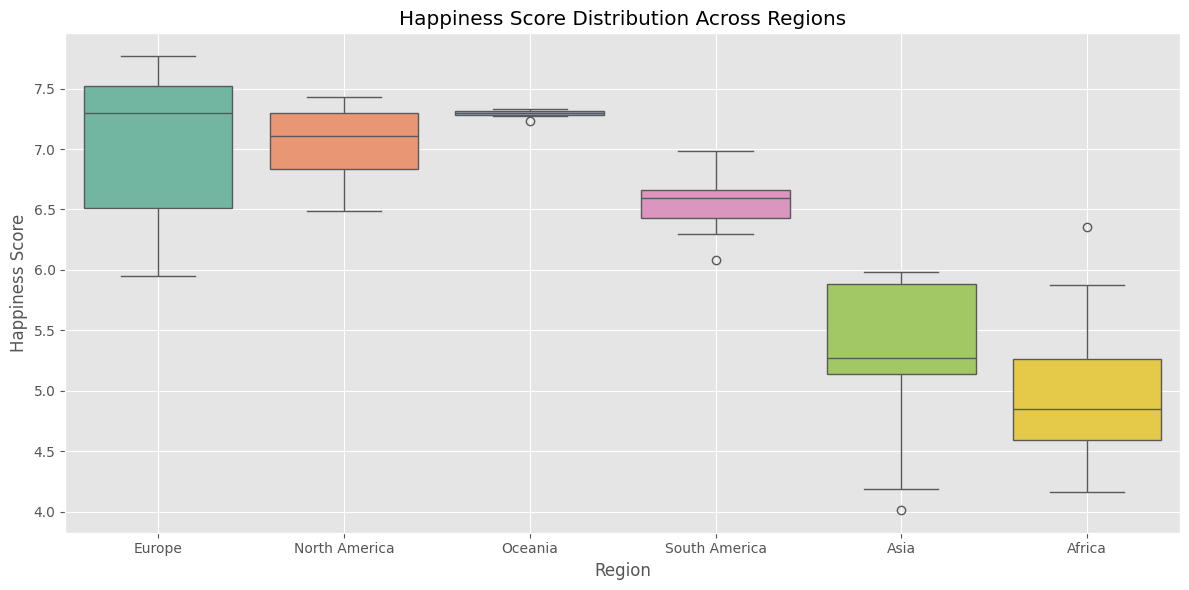

In [10]:
# 11. Compare Continents or Regions

# 11.1 Define region mapping
region_mapping = {
    # Africa
    'Algeria': 'Africa', 'Nigeria': 'Africa', 'South Africa': 'Africa', 'Egypt': 'Africa',
    # Europe
    'Germany': 'Europe', 'United Kingdom': 'Europe', 'France': 'Europe', 'Italy': 'Europe', 'Spain': 'Europe',
    'Norway': 'Europe', 'Denmark': 'Europe', 'Iceland': 'Europe', 'Finland': 'Europe', 'Switzerland': 'Europe',
    # Asia
    'China': 'Asia', 'India': 'Asia', 'Japan': 'Asia', 'South Korea': 'Asia', 'Indonesia': 'Asia',
    # North America
    'United States': 'North America', 'Canada': 'North America', 'Mexico': 'North America',
    # South America
    'Brazil': 'South America', 'Argentina': 'South America', 'Chile': 'South America',
    # Oceania
    'Australia': 'Oceania', 'New Zealand': 'Oceania',
}

# 11.2 Apply region mapping
df_all['region'] = df_all['country'].map(region_mapping)
df_region = df_all.dropna(subset=['region'])

# 11.3 Boxplot (clean, future-proof)
plt.figure(figsize=(12, 6))
sns.boxplot(
    data=df_region,
    x='region',
    y='happiness_score',
    hue='region',  # Fix for future versions
    dodge=False,
    legend=False,
    palette='Set2'
)
plt.title('Happiness Score Distribution Across Regions')
plt.xlabel('Region')
plt.ylabel('Happiness Score')
plt.grid(True)
plt.tight_layout()
plt.savefig('happiness_boxplot_regions.png', dpi=300)
plt.show()


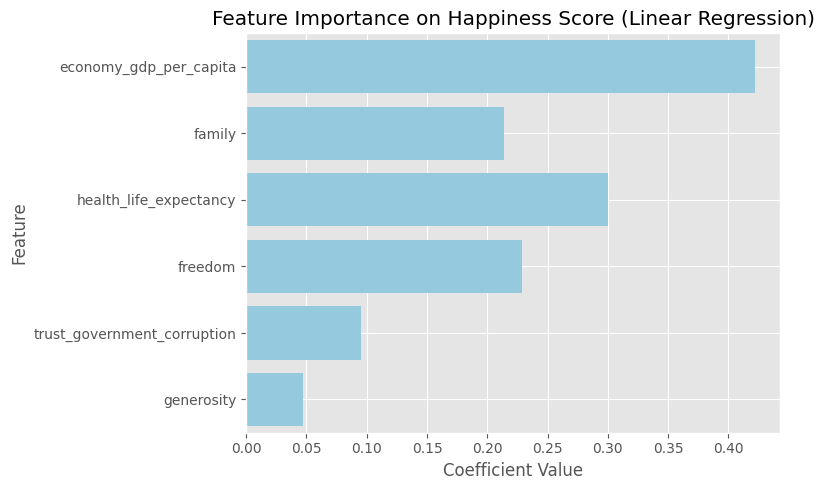

In [11]:
# 12. Indicator Importance (Feature Contribution)

from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import StandardScaler

# 12.1 Select features and target
features = [
    'economy_gdp_per_capita',
    'family',
    'health_life_expectancy',
    'freedom',
    'trust_government_corruption',
    'generosity'
]
target = 'happiness_score'

# 12.2 Drop rows with missing values
df_clean = df_all.dropna(subset=features + [target])

# 12.3 Prepare X and y
X = df_clean[features]
y = df_clean[target]

# 12.4 Scale the features for consistency
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# 12.5 Train Linear Regression
model = LinearRegression()
model.fit(X_scaled, y)

# 12.6 Get feature importances
importance = model.coef_

# 12.7 Plot feature importance without future warning
plt.figure(figsize=(8, 5))
sns.barplot(
    x=importance,
    y=features,
    orient='h',
    color='skyblue'  # uses a single color to avoid hue requirement
)
plt.title('Feature Importance on Happiness Score (Linear Regression)')
plt.xlabel('Coefficient Value')
plt.ylabel('Feature')
plt.grid(True)
plt.tight_layout()
plt.savefig('feature_importance_happiness.png', dpi=300)
plt.show()

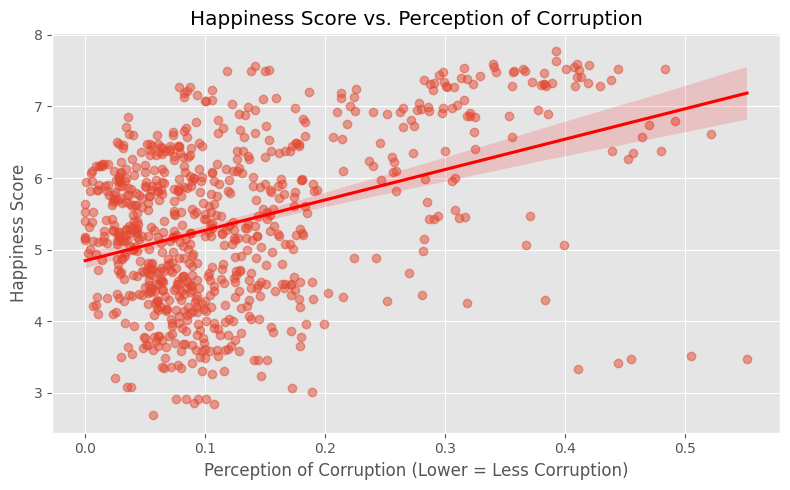

In [12]:
# 13. Trend of Happiness vs. Corruption Perception

plt.figure(figsize=(8, 5))
sns.regplot(
    data=df_all,
    x='trust_government_corruption',
    y='happiness_score',
    scatter_kws={'alpha':0.5},
    line_kws={'color':'red'}
)
plt.title('Happiness Score vs. Perception of Corruption')
plt.xlabel('Perception of Corruption (Lower = Less Corruption)')
plt.ylabel('Happiness Score')
plt.grid(True)
plt.tight_layout()
plt.savefig('happiness_vs_corruption.png', dpi=300)
plt.show()


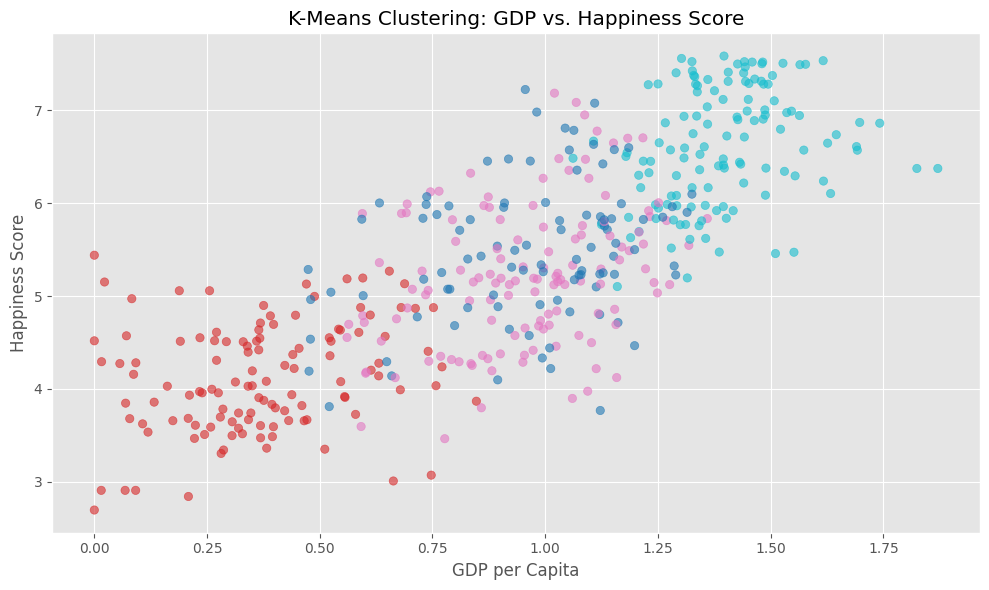

In [15]:
# 14. Cluster Countries by Happiness Factors (K-Means Clustering)

# What it does:
# ✅ Clusters countries using GDP, social support, health, freedom, corruption, generosity
# ✅ Handles missing values safely using column means
# ✅ Uses K-Means for unsupervised grouping into 4 clusters
# ✅ Visualizes clusters on a scatter plot for advanced analysis

from sklearn.cluster import KMeans

# Select relevant features for clustering
features_cluster = [
    'economy_gdp_per_capita', 'family', 'health_life_expectancy',
    'freedom', 'trust_government_corruption', 'generosity'
]
X_cluster = df_all[features_cluster].copy()

# Fill missing values with column means to avoid KMeans errors
X_cluster.fillna(X_cluster.mean(), inplace=True)

# Apply K-Means clustering
kmeans = KMeans(n_clusters=4, random_state=42, n_init=10)
df_all['cluster'] = kmeans.fit_predict(X_cluster)

# Plot clusters
plt.figure(figsize=(10, 6))
scatter = plt.scatter(
    df_all['economy_gdp_per_capita'],
    df_all['happiness_score'],
    c=df_all['cluster'],
    cmap='tab10',
    alpha=0.6
)
plt.title('K-Means Clustering: GDP vs. Happiness Score')
plt.xlabel('GDP per Capita')
plt.ylabel('Happiness Score')

# Save for PowerPoint
plt.tight_layout()
plt.savefig('kmeans_gdp_vs_happiness.png')
plt.show()

In [16]:
# 15. Animated Map of Happiness Over Time (Choropleth)

# What it does:
# ✅ Visualizes global happiness changes across 2015–2019
# ✅ Uses Plotly Express animated choropleth
# ✅ Useful for slide and dashboard embedding

import plotly.express as px

fig = px.choropleth(
    df_all,
    locations='country',
    locationmode='country names',
    color='happiness_score',
    hover_name='country',
    animation_frame='year',
    color_continuous_scale='Viridis',
    title='Animated Global Happiness Scores (2015–2019)',
    height=600
)

fig.show()

# Manually export as PNG using "Download as PNG" in the viewer:
# Save as: animated_choropleth_happiness.png

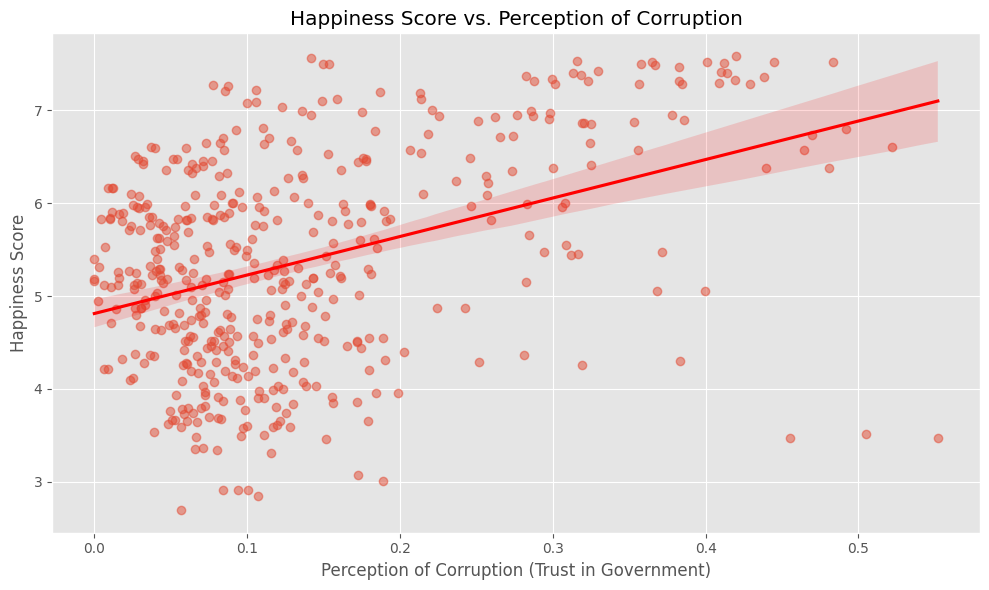

In [17]:
# 16. Trend of Happiness vs. Corruption Perception

# What it does:
# ✅ Examines the relationship between perceived corruption and happiness
# ✅ Uses scatter plot with regression line
# ✅ Useful for advanced correlation discussion

import seaborn as sns

plt.figure(figsize=(10, 6))
sns.regplot(
    data=df_all,
    x='trust_government_corruption',
    y='happiness_score',
    scatter_kws={'alpha': 0.5},
    line_kws={'color': 'red'}
)
plt.title('Happiness Score vs. Perception of Corruption')
plt.xlabel('Perception of Corruption (Trust in Government)')
plt.ylabel('Happiness Score')

# Save for PowerPoint
plt.tight_layout()
plt.savefig('happiness_vs_corruption.png')
plt.show()


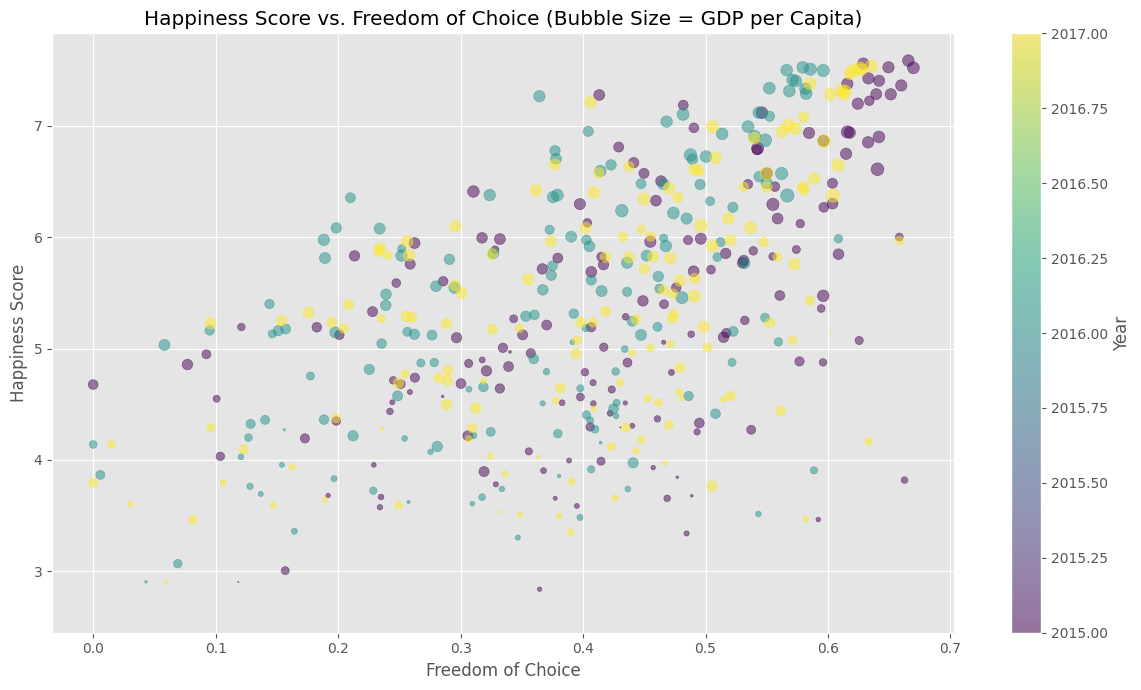

In [18]:
# 17. Happiness Score vs. Freedom of Choice (Bubble Plot)

# What it does:
# ✅ Explores relationship between happiness and freedom of life choices
# ✅ Uses bubble plot (bubble size = GDP per capita) to illustrate joint effects
# ✅ Useful for discussing how freedom and economic strength jointly impact happiness

import matplotlib.pyplot as plt

plt.figure(figsize=(12, 7))

# Create bubble scatter plot
scatter = plt.scatter(
    df_all['freedom'],
    df_all['happiness_score'],
    s=df_all['economy_gdp_per_capita'] * 50,  # scale GDP for bubble size
    alpha=0.5,
    c=df_all['year'],
    cmap='viridis'
)

# Add color bar for year distinction
cbar = plt.colorbar(scatter)
cbar.set_label('Year')

# Labels and title
plt.title('Happiness Score vs. Freedom of Choice (Bubble Size = GDP per Capita)')
plt.xlabel('Freedom of Choice')
plt.ylabel('Happiness Score')

# Save for PowerPoint and documentation
plt.tight_layout()
plt.savefig('happiness_vs_freedom_bubble.png')

plt.show()

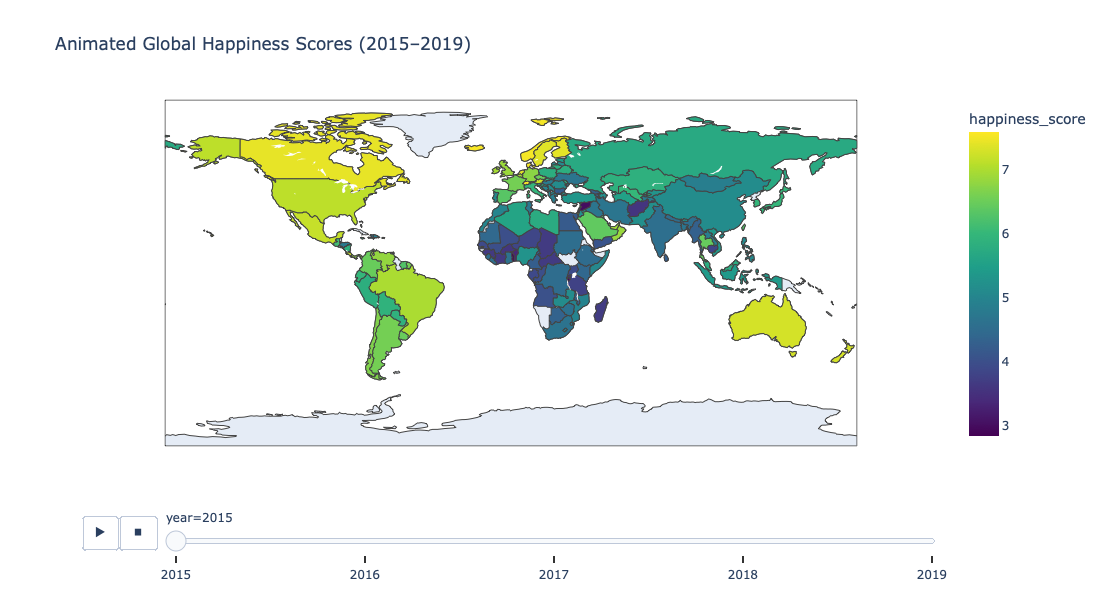

In [26]:
# 18.0: Animated Choropleth Map of Global Happiness Over Time
# What it does:
# ✅ Creates an interactive animated choropleth map
# ✅ Visualizes happiness scores globally from 2015–2019
# ✅ Enables year-by-year comparative exploration for presentations and reports

import plotly.express as px

# Create animated choropleth map
fig = px.choropleth(
    df_all,
    locations="country",                   # Country names
    locationmode="country names",
    color="happiness_score",               # Color mapped to happiness scores
    animation_frame="year",                # Animate over years
    color_continuous_scale="Viridis",      # Color scale
    hover_name="country",                  # Show country name on hover
    title="Animated Global Happiness Scores (2015–2019)",
    height=600
)

# Display the animation
fig.show()

In [34]:
# 18.1 Country Profile Dashboard

# What it does:
# ✅ Creates an interactive profile selector for countries
# ✅ Displays trends and factors in a combined plot
# ✅ Useful for live demos and advanced dashboards

import ipywidgets as widgets
from IPython.display import display

# Dropdown for country selection
country_dropdown = widgets.Dropdown(
    options=sorted(df_all['country'].unique()),
    description='Country:',
    value='Finland'
)

def plot_country_profile(selected_country):
    country_data = df_all[df_all['country'] == selected_country]

    fig, ax = plt.subplots(figsize=(10, 6))
    sns.lineplot(
        data=country_data,
        x='year',
        y='happiness_score',
        marker='o',
        label='Happiness Score'
    )
    sns.lineplot(
        data=country_data,
        x='year',
        y='economy_gdp_per_capita',
        marker='s',
        label='GDP per Capita'
    )
    plt.title(f'Happiness and GDP Trend: {selected_country}')
    plt.xlabel('Year')
    plt.ylabel('Score')
    plt.legend()
    plt.show()

widgets.interact(plot_country_profile, selected_country=country_dropdown);


interactive(children=(Dropdown(description='Country:', index=46, options=('Afghanistan', 'Albania', 'Algeria',…

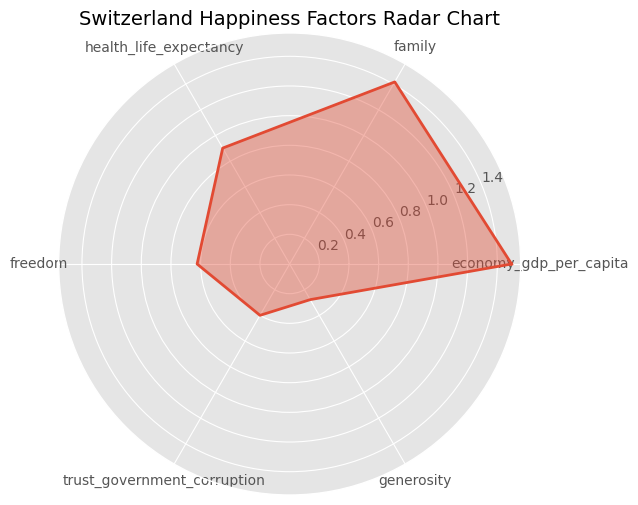

In [33]:
# 18.2: Radar Chart for Country Profile
# What it does:
# ✅ Generates a radar/spider chart for a selected country
# ✅ Shows key factors (GDP, family, health, freedom, trust, generosity)
# ✅ Useful for comparing individual country profiles in presentations and reports

from math import pi
import matplotlib.pyplot as plt

def plot_radar_country(country_name):
    # Calculate mean values for the selected country
    country_avg = df_all[df_all['country'] == country_name][[
        'economy_gdp_per_capita',
        'family',
        'health_life_expectancy',
        'freedom',
        'trust_government_corruption',
        'generosity'
    ]].mean()

    categories = list(country_avg.index)
    values = country_avg.values.flatten().tolist()
    values += values[:1]  # repeat the first value to close the circle

    angles = [n / float(len(categories)) * 2 * pi for n in range(len(categories))]
    angles += angles[:1]

    fig, ax = plt.subplots(figsize=(6, 6), subplot_kw=dict(polar=True))

    # Plot the radar chart
    ax.plot(angles, values, linewidth=2, linestyle='solid')
    ax.fill(angles, values, alpha=0.4)

    # Add labels and title
    ax.set_xticks(angles[:-1])
    ax.set_xticklabels(categories, fontsize=10)
    ax.set_title(f"{country_name} Happiness Factors Radar Chart", fontsize=14)

    # Optional: save for your PowerPoint
    plt.savefig(f"{country_name}_happiness_radar_chart.png")

    plt.show()

# Example: Generate radar chart for Switzerland
plot_radar_country("Switzerland")

# 19. Final Packaging Recap

## ✅ Files to Submit:
- `Gobal_Happiness_Project_Rono.ipynb` (Jupyter analysis file)
- `Global_Happiness_Project_Rono.pptx` (PowerPoint presentation with visuals)
- `Global_Happiness_Project_Rono.pdf` (exported report with code and plots)
- 5-minute demo video (narrating slides + dashboard demo)

## ✅ GitHub:
- Pushed to [Global Happiness Analysis Repository](https://github.com/ronospace/global-happiness-analysis)
- README updated with:
  - Clear description
  - Project badges
  - Screenshot
  - Live Streamlit link
- Pinned on your GitHub profile for visibility

## ✅ Streamlit:
- Live demo deployed: [ronospace-global-happiness-an-global-happiness-dashboard-qcmfay.streamlit.app](https://ronospace-global-happiness-an-global-happiness-dashboard-qcmfay.streamlit.app)
- Ready to share on LinkedIn, CV, or during your presentation

## ✅ LinkedIn:
- Post drafted, posted, and pinned for visibility
- Contains:
  - Project summary
  - GitHub link
  - Streamlit live demo link
  - Relevant hashtags (#UEPotsdam #DataScience #Python)

## ✅ Optional Enhancements:
- Add your 5-minute demo video to LinkedIn
- Create a pinned portfolio highlight for this project
- Add your GitHub repo + Streamlit link to your CV